In [1]:
!nvidia-smi

Fri Jan 17 00:10:19 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.1/112.6 GB disk)


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="UphOztRZZUp98uYVgmma")
project = rf.workspace("sohila-byynn").project("grad-hohc6")
version = project.version(5)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Grad-5 in yolov8:: 100%|██████████| 2278/2278 [00:00<00:00, 4703.28it/s]


In [6]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs= 100 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 85.3MB/s]
New https://pypi.org/project/ultralytics/8.3.62 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Grad-5/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_ma

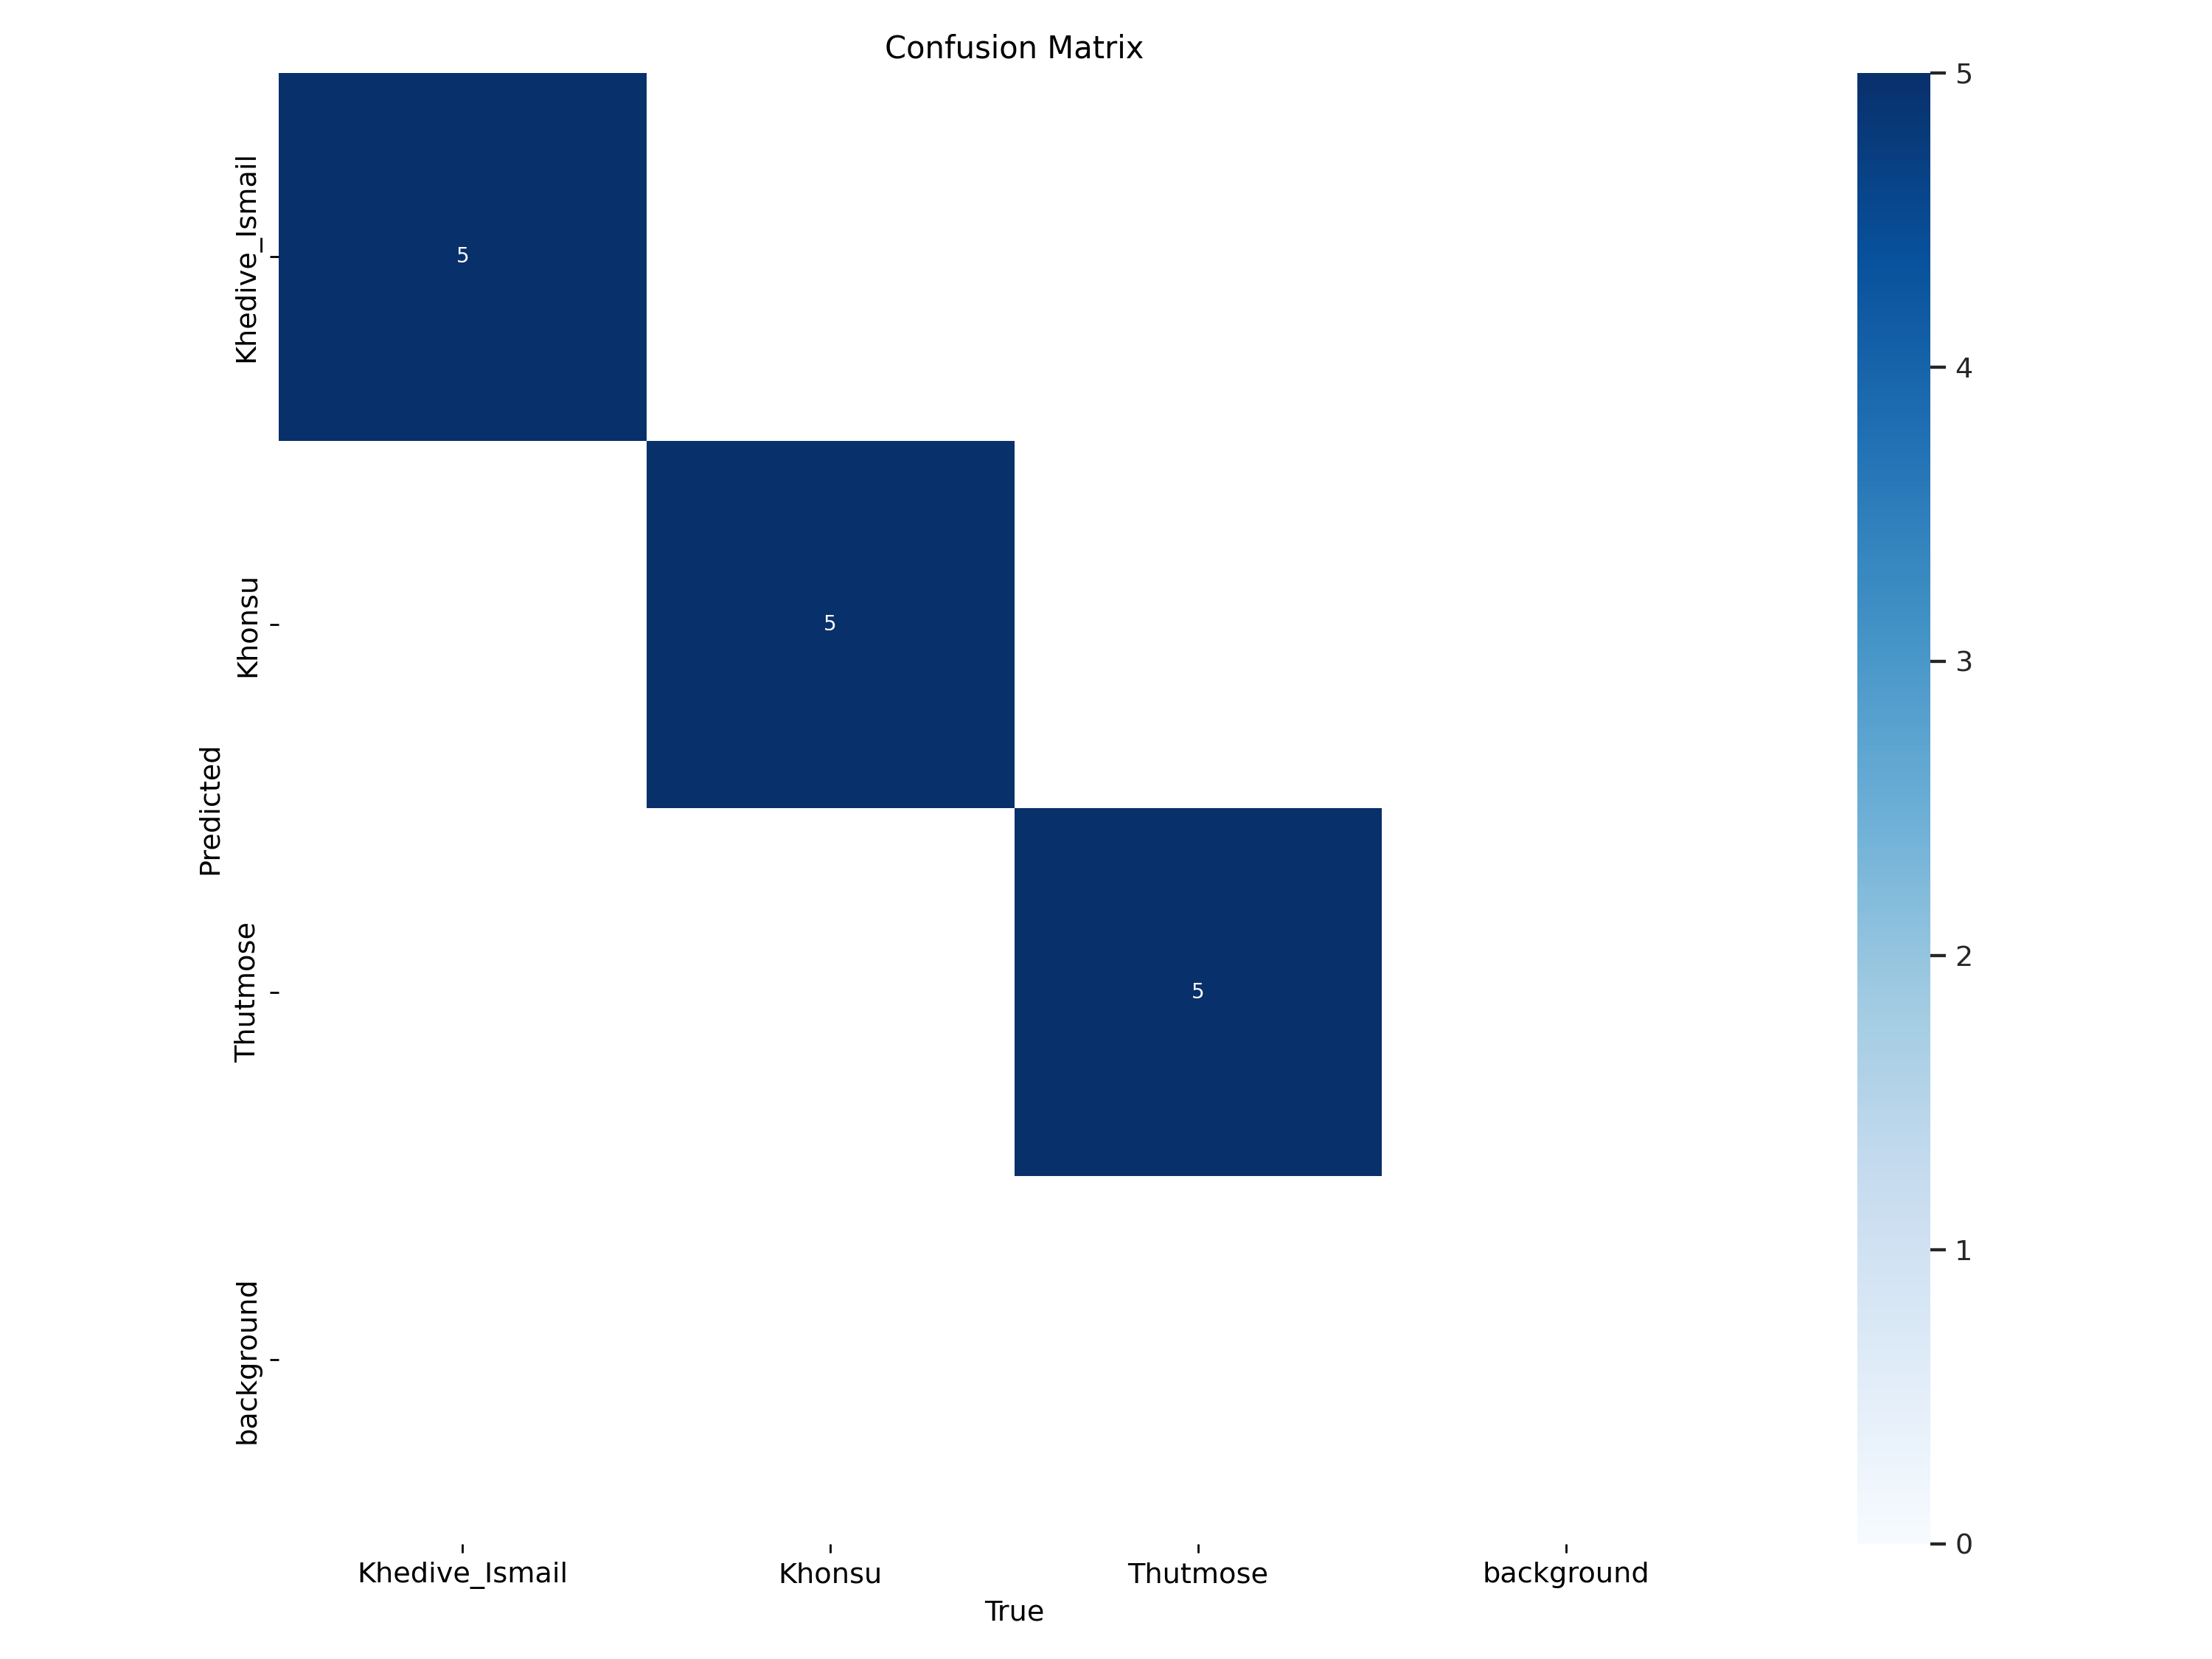

In [7]:
Image("/content/runs/detect/train/confusion_matrix.png",width= 800)

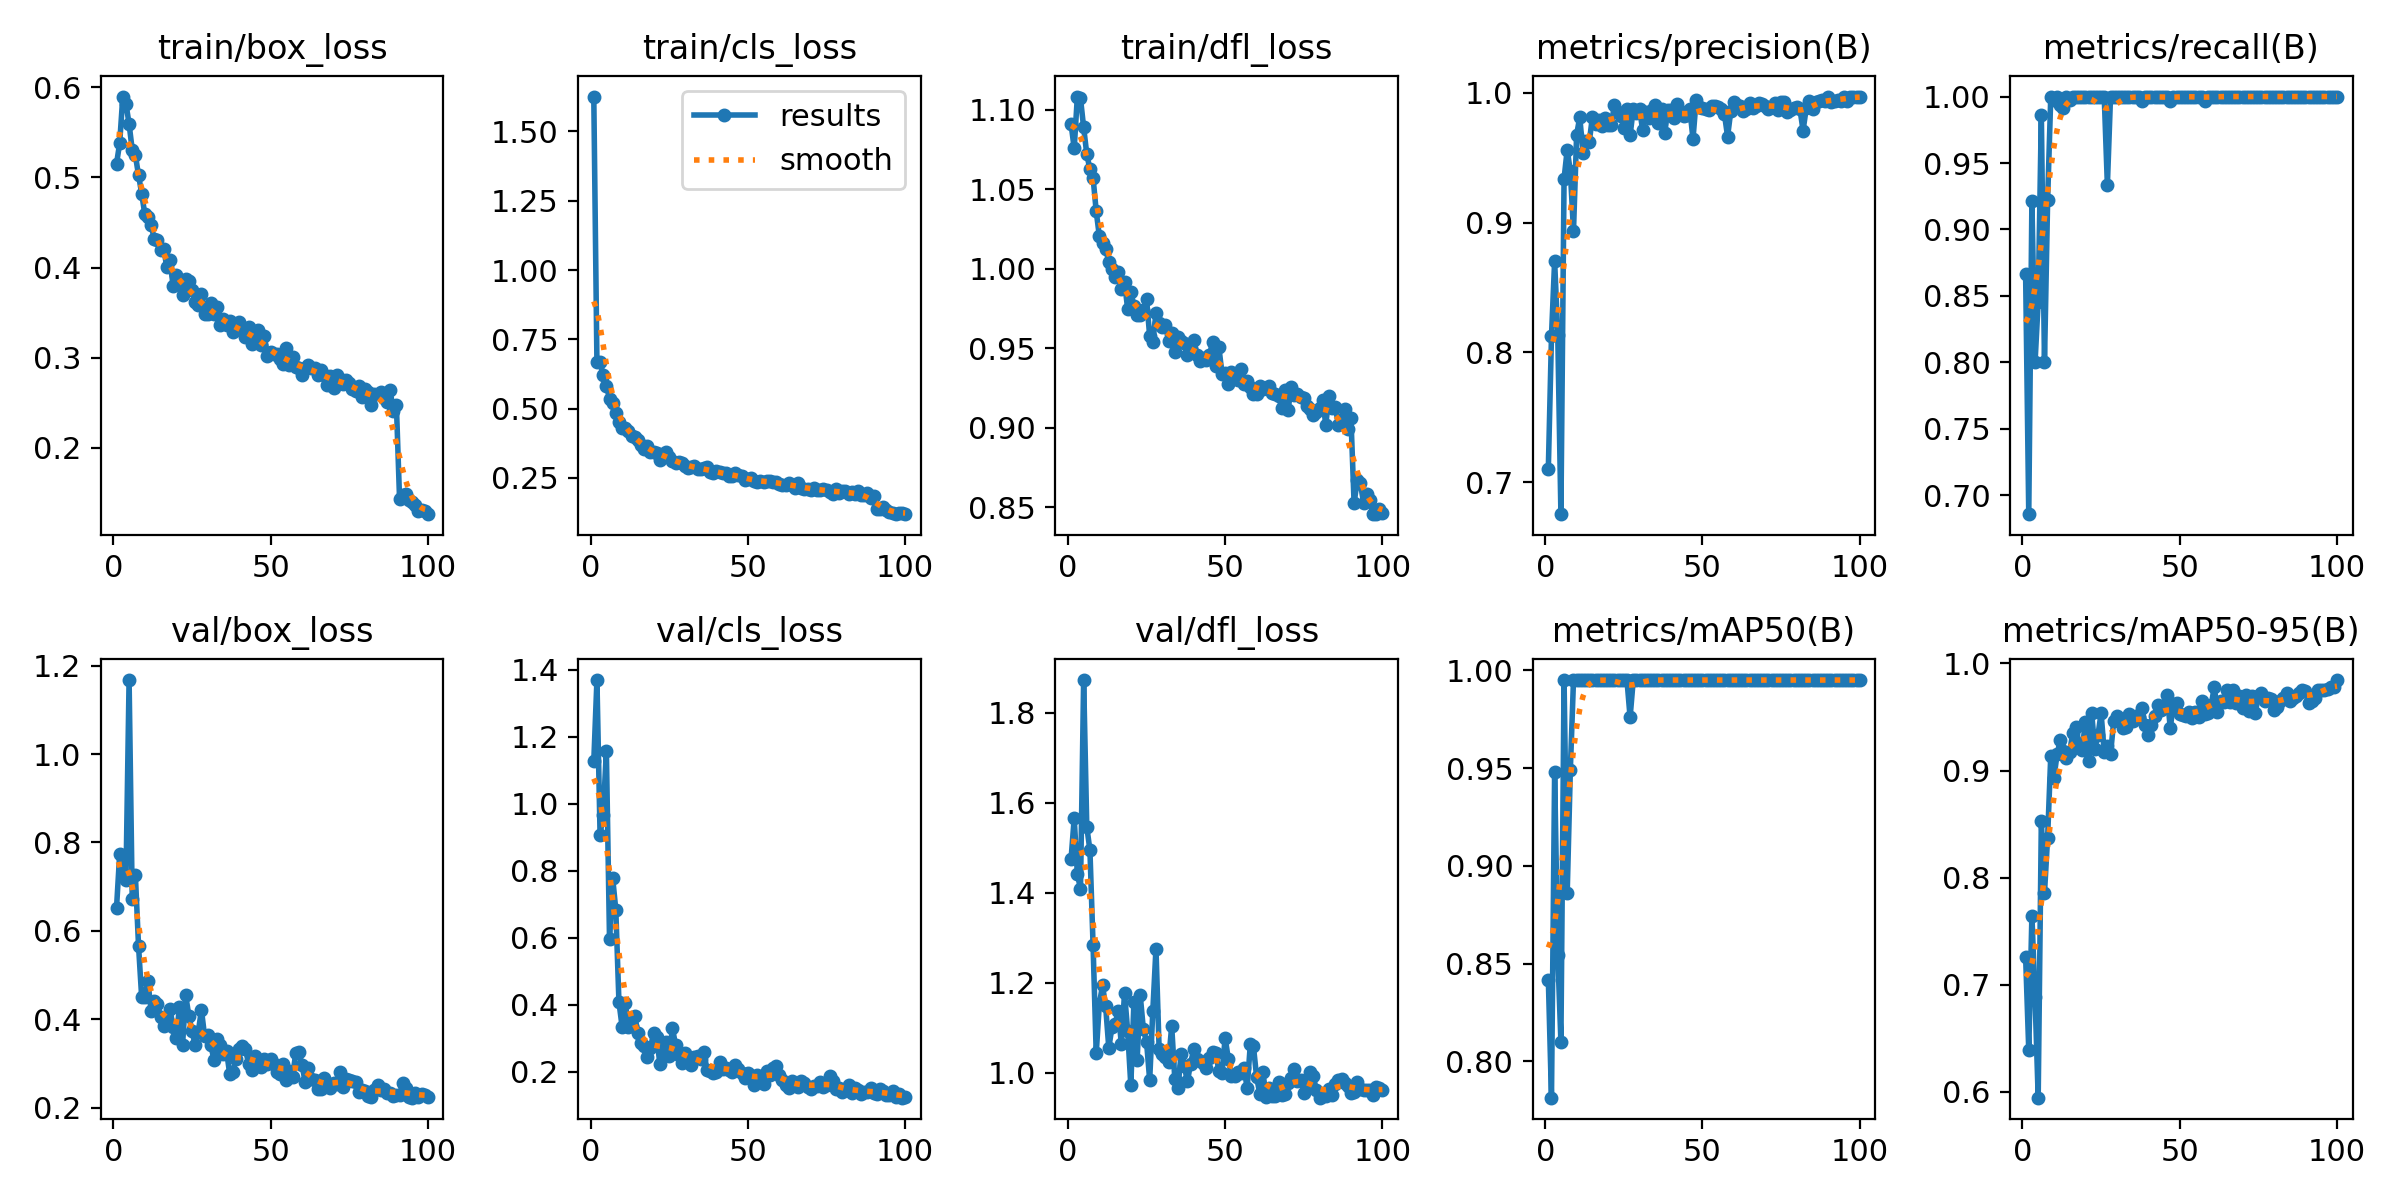

In [8]:
Image("/content/runs/detect/train/results.png",width= 800)

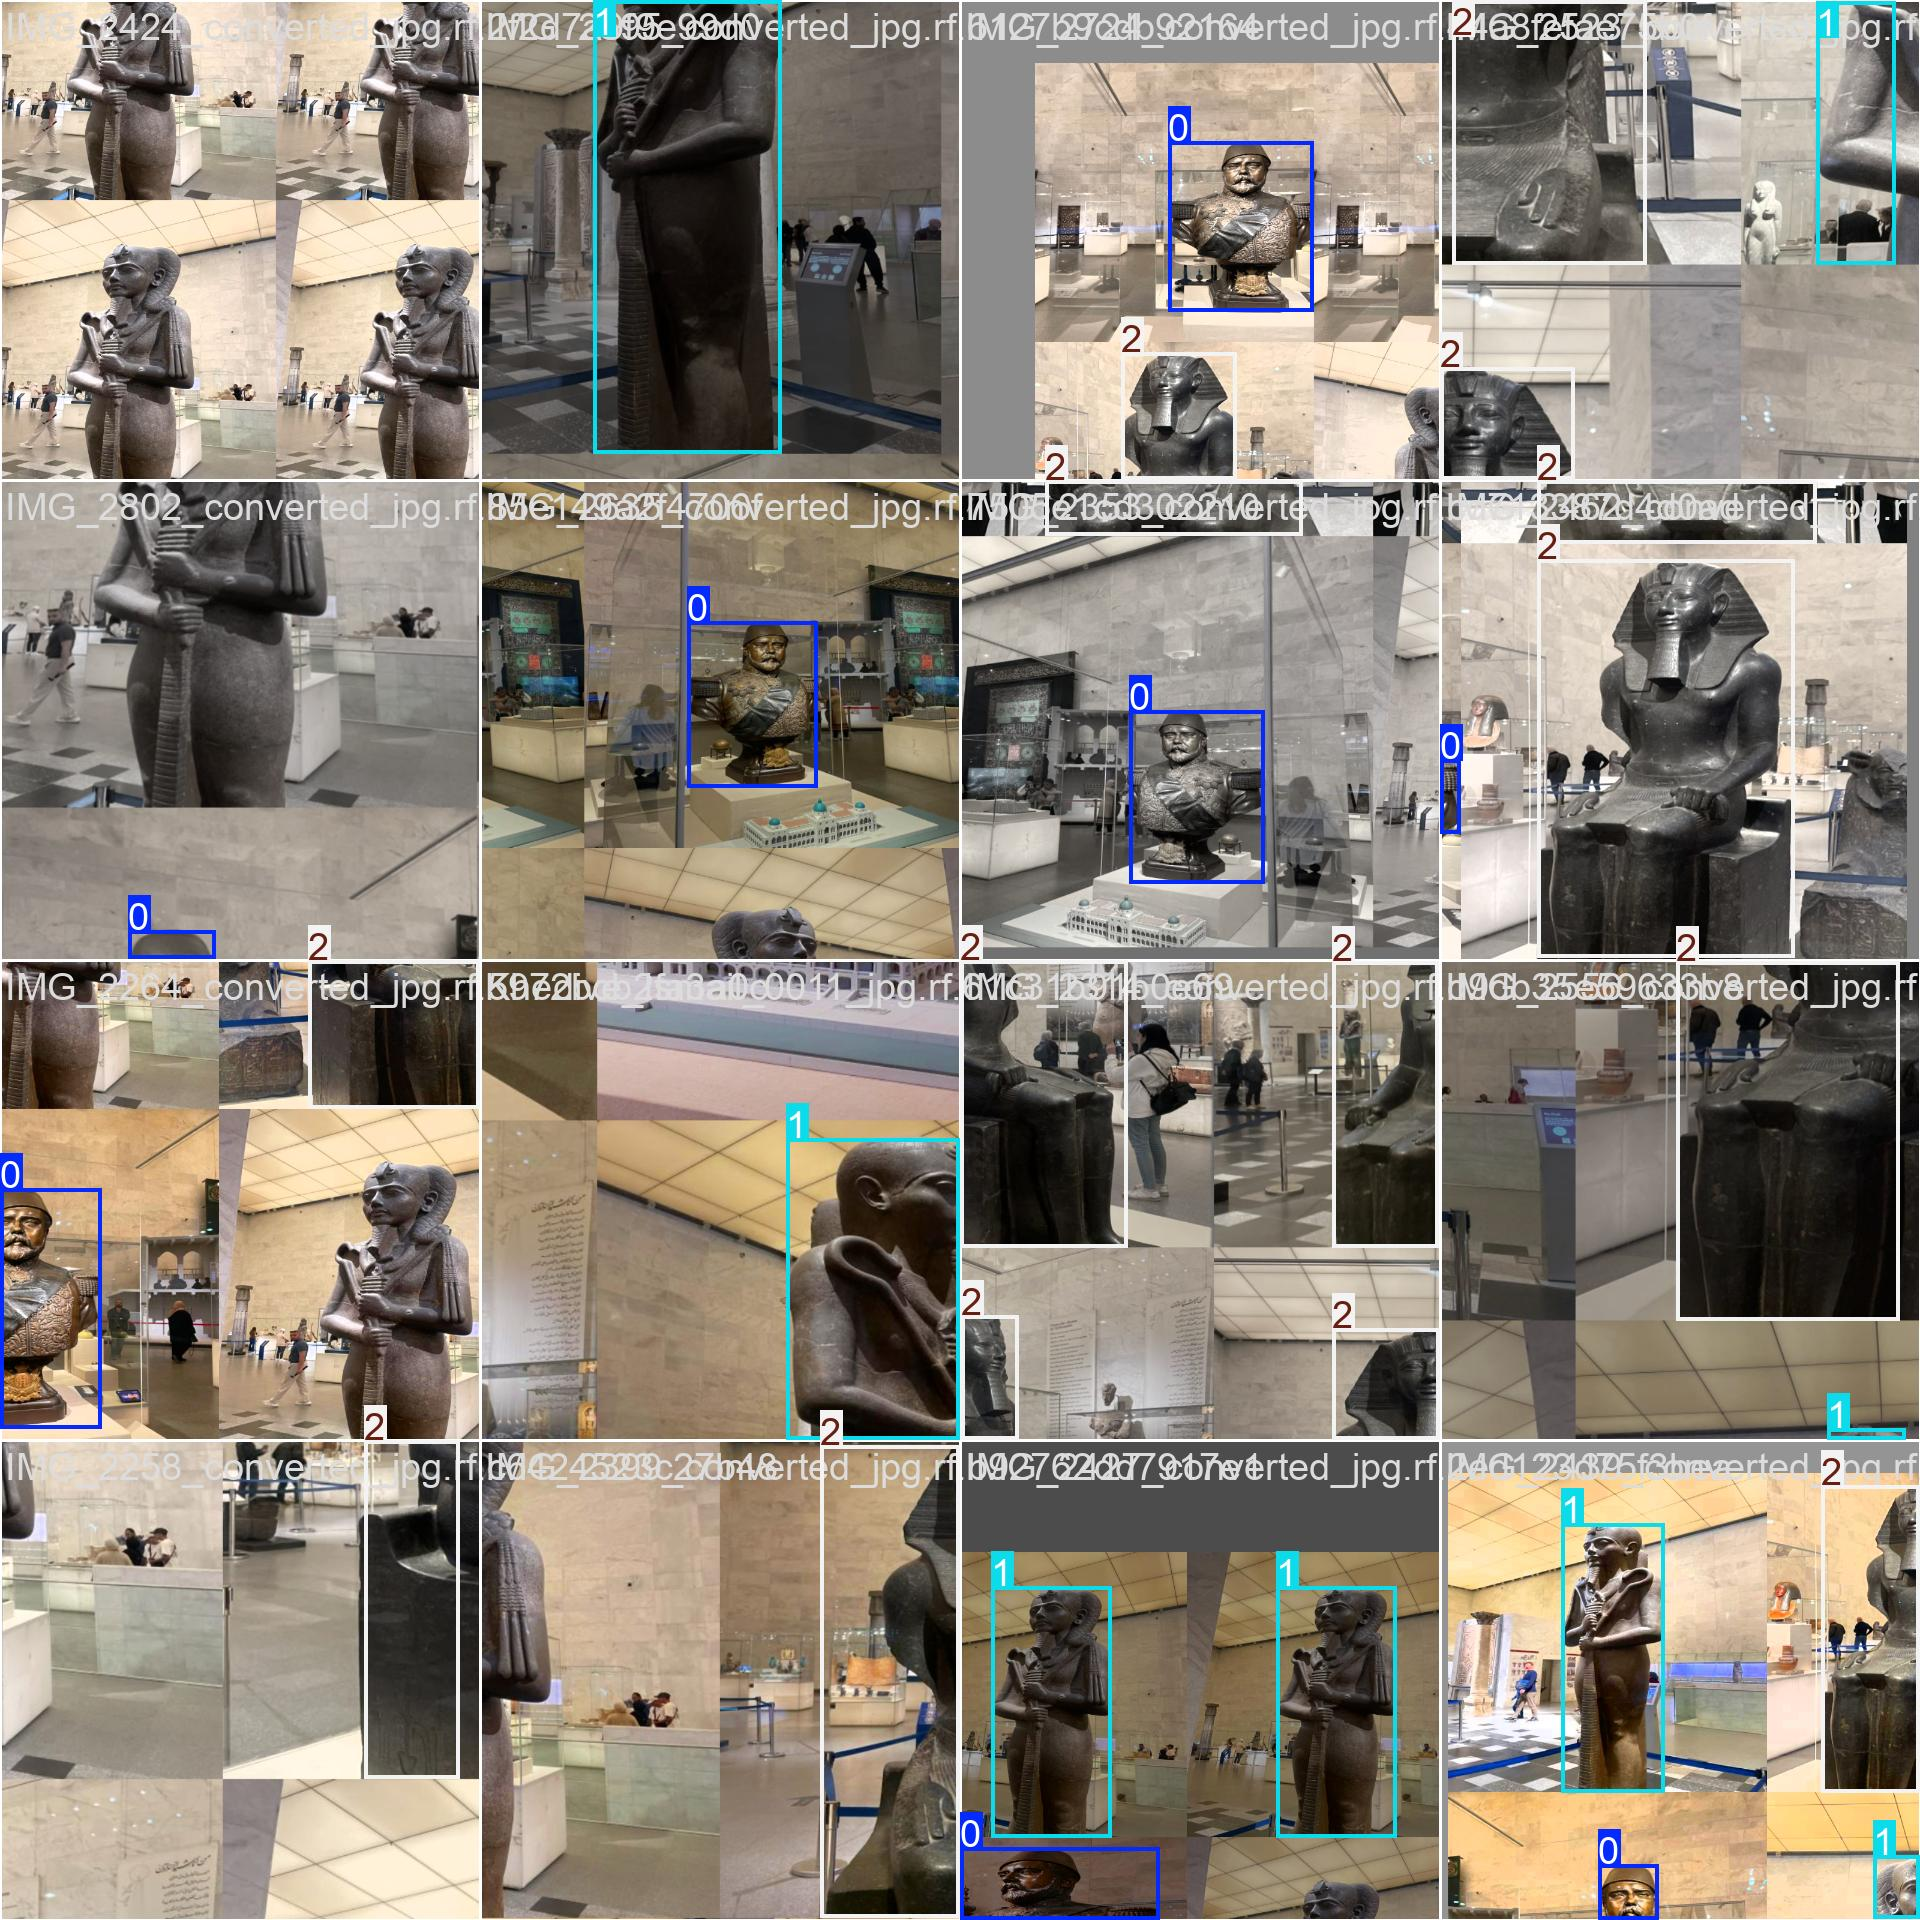

In [9]:
Image("/content/runs/detect/train/train_batch0.jpg",width= 800)

In [10]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Grad-5/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100% 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.06s/it]
                   all         15         15      0.997          1      0.995      0.973
        Khedive_Ismail          5          5          1          1      0.995      0.946
                Khonsu          5          5          1          1      0.995      0.995
              Thutmose          5          5      0.991          1      0.995      0.979
Speed: 0.4ms preprocess, 15.4ms inference, 0.0ms loss, 40.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [11]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/3 /content/Grad-5/test/images/IMG_2237_converted_jpg.rf.b45f4eee938e703c64f6cc3f6ad2c865.jpg: 800x800 1 Thutmose, 22.8ms
image 2/3 /content/Grad-5/test/images/IMG_2419_converted_jpg.rf.256f5aea53685c297e2899154d566cb4.jpg: 800x800 1 Khonsu, 22.8ms
image 3/3 /content/Grad-5/test/images/Khedive_Ismail_0016_jpg.rf.d2a934e43dff1bf70886b5239f7fa476.jpg: 800x800 1 Khedive_Ismail, 22.8ms
Speed: 5.8ms preprocess, 22.8ms inference, 195.2ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


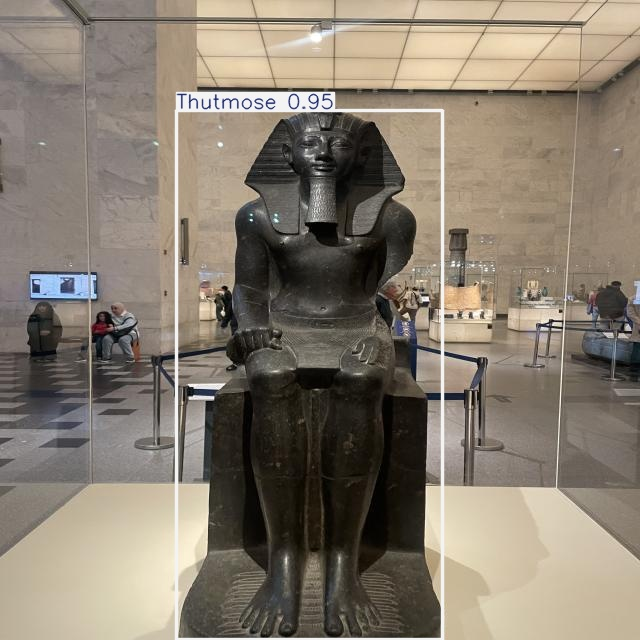

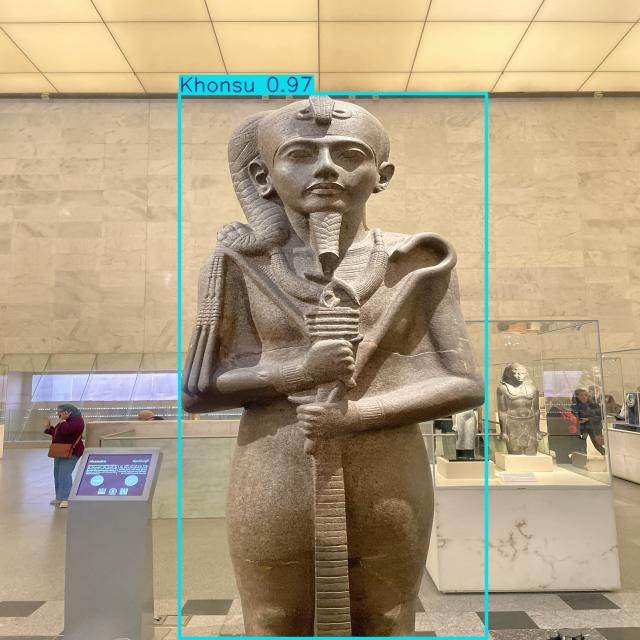

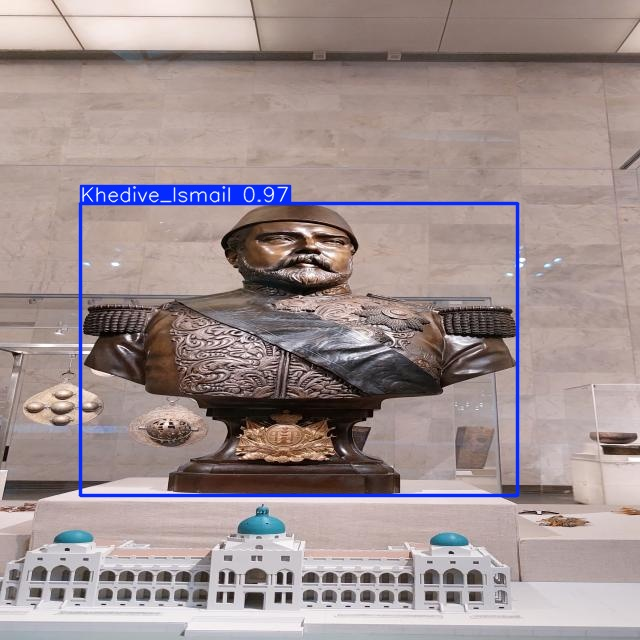

In [12]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[0:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")